In [ ]:
import pickle

bug_file = open('data/bugfixes_train.pickle','rb')
bug_info = pickle.load(bug_file)
print(type(bug_info))
print(bug_info)

info_subset = bug_info.head(10)
info_subset.to_csv('bugfixes_train_subset.csv', index=False)

bug_info.to_csv('bugfixes_train.csv', index=False)
print("Data saved to bugfixes_train.csv")

In [ ]:
import pickle

stable_file = open('data/stable_code_train.pickle','rb')
stable_info = pickle.load(stable_file)
print(type(stable_info))
print(stable_info)

info_subset = stable_info.head(10)
info_subset.to_csv('stable_code_train_subset.csv', index=False)

stable_info.to_csv('stable_code_train.csv', index=False)
print("Data saved to stable_code_train.csv")

In [ ]:
import pandas as pd
import os

def update_file_content(csv_file, output_file, prefix='data/'):
    
    data = pd.read_csv(csv_file)

    data['path_to_snippet_before_merge'] = prefix + data['path_to_snippet_before_merge'].astype(str)

    def read_file_content(file_path):
        if os.path.exists(file_path):
            try:
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                    return file.read()
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
                return None
        return None  

    data['before_merge'] = data['path_to_snippet_before_merge'].apply(read_file_content)

 
    data.to_csv(output_file, index=False)
    print(f"Data with updated file paths and contents saved to {output_file}")

# 配置路径
csv_file = 'stable_code_train.csv'  
output_file = 'stable_code_train_updated.csv'  

# 执行并保存结果
update_file_content(csv_file, output_file)


In [ ]:
import pandas as pd
from sklearn.utils import resample

buggy_data = pd.read_csv('bugfixes_train.csv')
stable_data = pd.read_csv('stable_code_train_updated.csv')

num_buggy_samples = len(buggy_data)

stable_downsampled = resample(stable_data, replace=False, n_samples=num_buggy_samples, random_state=42)

stable_downsampled.to_csv('stable_data_downsampled.csv', index=False)

print(f"Downsampled stable data saved to 'stable_data_downsampled.csv'.")


In [ ]:
import pandas as pd
import re

stable_downsampled_data = pd.read_csv('stable_data_downsampled.csv')

def extract_docstrings(code):
    """提取代码中的docstrings，并格式化为 ['[docstring内容]'] 或 [] 的样式"""
    docstrings = re.findall(r'("""[\s\S]*?"""|\'\'\'[\s\S]*?\'\'\')', code)
    if docstrings:
        formatted_docstrings = [ds.strip('"""').strip("'''").strip() for ds in docstrings]
        return str(formatted_docstrings)
    else:
        return "[]"

def remove_docstrings(code):
    """移除代码中的docstrings"""
    code_without_docstrings = re.sub(r'("""[\s\S]*?"""|\'\'\'[\s\S]*?\'\'\')', '', code)
    return code_without_docstrings.strip()

stable_downsampled_data['before_merge_without_docstrings'] = stable_downsampled_data['before_merge'].apply(remove_docstrings)
stable_downsampled_data['before_merge_docstrings'] = stable_downsampled_data['before_merge'].apply(extract_docstrings)

stable_downsampled_data.to_csv('stable_data_downsampled_with_docstrings.csv', index=False)

print(f"Data with extracted docstrings saved to 'stable_data_downsampled_with_docstrings.csv'.")

In [ ]:
import pandas as pd
import numpy as np

# 读取CSV文件
sddwd_data = pd.read_csv('stable_data_downsampled_with_docstrings.csv')

sddwd_data['status'] = 0

sddwd_data['source code and errors'] = np.nan
sddwd_data['full_traceback'] = np.nan
sddwd_data['traceback_type'] = np.nan

sddwd_data.to_csv('stable_data_downsampled_with_docstrings_add.csv', index=False)

print(f"Data with 'status', 'source code and errors', 'full_traceback', and 'traceback_type' columns saved to 'stable_data_downsampled_with_docstrings_add.csv'.")



In [ ]:
import pandas as pd
import numpy as np

bugfixes_data = pd.read_csv('bugfixes_train.csv')

bugfixes_data['status'] = 1

stable_data = pd.read_csv('stable_data_downsampled_with_docstrings_add.csv')

times_median = stable_data['times'].median()
times_mode_list = stable_data['times'].mode()
times_mode_median = times_mode_list.median()

bugfixes_data['times'] = np.random.randint(times_mode_median, times_median + 1, size=len(bugfixes_data))

bugfixes_data.to_csv('bugfixes_train_add.csv', index=False)

print(f"Data with 'times' and 'status' columns saved to 'bugfixes_train_add.csv'.")

In [ ]:
import pandas as pd

bugfixes_data = pd.read_csv('bugfixes_train_add.csv')
stable_data = pd.read_csv('stable_data_downsampled_with_docstrings_add.csv')

common_columns = bugfixes_data.columns.intersection(stable_data.columns)
merged_data = pd.concat([bugfixes_data[common_columns], stable_data[common_columns]], ignore_index=True)

merged_data = merged_data.sample(frac=1, random_state=42).reset_index(drop=True)

columns_order = [
    'filename', 'function_name', 'path_to_snippet_before_merge', 'before_merge', 'before_merge_without_docstrings', 
    'before_merge_docstrings', 'source code and errors', 'full_traceback', 'traceback_type','times', 'status'
]

merged_data = merged_data[columns_order]
merged_data.to_csv('pythonbug_train.csv', index=False)

print(f"Merged and shuffled data saved to 'pythonbug_train.csv'.")


In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import ast
import scipy.sparse
from scipy.sparse import hstack
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import scipy.sparse
from scipy.sparse import hstack
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay


In [2]:
import torch
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from transformers import RobertaTokenizer, RobertaForSequenceClassification, GPT2Tokenizer, GPT2LMHeadModel
from xgboost import XGBClassifier


c:\Users\FKun\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# 加载数据集
pybug = pd.read_csv('pythonbug_train.csv')

columns_to_extract = [
    'before_merge',
    'before_merge_without_docstrings',
    'before_merge_docstrings',
    'source code and errors',
    'full_traceback'
]

def extract_ast_features(code):
    try:
        tree = ast.parse(code)
        features = []
        for node in ast.walk(tree):
            features.append(type(node).__name__)
        return ' '.join(features)
    except:
        return ''  

for column in columns_to_extract:
    pybug[f'{column}_ast_features'] = pybug[column].apply(extract_ast_features)

<unknown>:1: SyntaxWarning: invalid escape sequence '\s'
<unknown>:48: SyntaxWarning: invalid escape sequence '\s'
<unknown>:38: SyntaxWarning: invalid escape sequence '\d'
<unknown>:2: SyntaxWarning: invalid escape sequence '\_'
<unknown>:51: SyntaxWarning: invalid escape sequence '\s'
<unknown>:52: SyntaxWarning: invalid escape sequence '\]'
<unknown>:51: SyntaxWarning: invalid escape sequence '\M'
<unknown>:101: SyntaxWarning: invalid escape sequence '\.'
<unknown>:63: SyntaxWarning: invalid escape sequence '\$'
<unknown>:14: SyntaxWarning: invalid escape sequence '\s'
<unknown>:2: SyntaxWarning: invalid escape sequence '\g'
<unknown>:3: SyntaxWarning: invalid escape sequence '\s'
<unknown>:33: SyntaxWarning: invalid escape sequence '\,'
<unknown>:2: SyntaxWarning: invalid escape sequence '\d'
<unknown>:215: SyntaxWarning: invalid escape sequence '\('
<unknown>:2: SyntaxWarning: invalid escape sequence '\*'
<unknown>:7: SyntaxWarning: invalid escape sequence '\('
<unknown>:2: Syntax

In [4]:
sentences = [text.split() for text in pybug[f'{column}_ast_features']]

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

model.save("word2vec_model.bin")

vector_size = model.vector_size

def get_word2vec_vector(text, model, vector_size):
    words = text.split()  
    vectors = [model.wv[word] for word in words if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

word2vec_matrices = []

for column in columns_to_extract:
    vectors = [get_word2vec_vector(text, model, vector_size) for text in pybug[f'{column}_ast_features']]
    
    X_word2vec = np.array(vectors)
    
    word2vec_matrices.append(X_word2vec)

X_word2vec_combined = np.hstack(word2vec_matrices)

In [5]:

original_features = pybug[['times', 'traceback_type']]

encoder = OneHotEncoder(sparse_output=False)
encoded_traceback_type = encoder.fit_transform(original_features[['traceback_type']])
original_features_encoded = np.hstack([original_features[['times']].values, encoded_traceback_type])
original_features_sparse = scipy.sparse.csr_matrix(original_features_encoded)
X_combined = hstack([original_features_sparse, X_word2vec_combined])

X_combined = X_combined.toarray()

Fold 1 Accuracy: 0.7477
Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.49      0.66      2804
           1       0.67      1.00      0.80      2844

    accuracy                           0.75      5648
   macro avg       0.83      0.75      0.73      5648
weighted avg       0.83      0.75      0.73      5648

Fold 2 Accuracy: 0.7455
Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.48      0.65      2774
           1       0.67      1.00      0.80      2873

    accuracy                           0.75      5647
   macro avg       0.83      0.74      0.73      5647
weighted avg       0.83      0.75      0.73      5647

Fold 3 Accuracy: 0.7381
Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.48      0.65      2856
           1       0.65      1.00      0.79      2791

    accuracy        

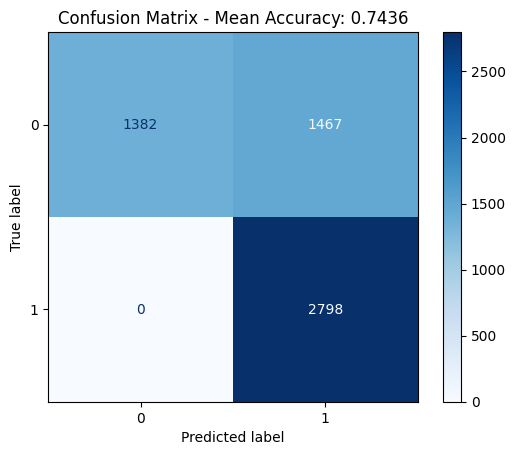

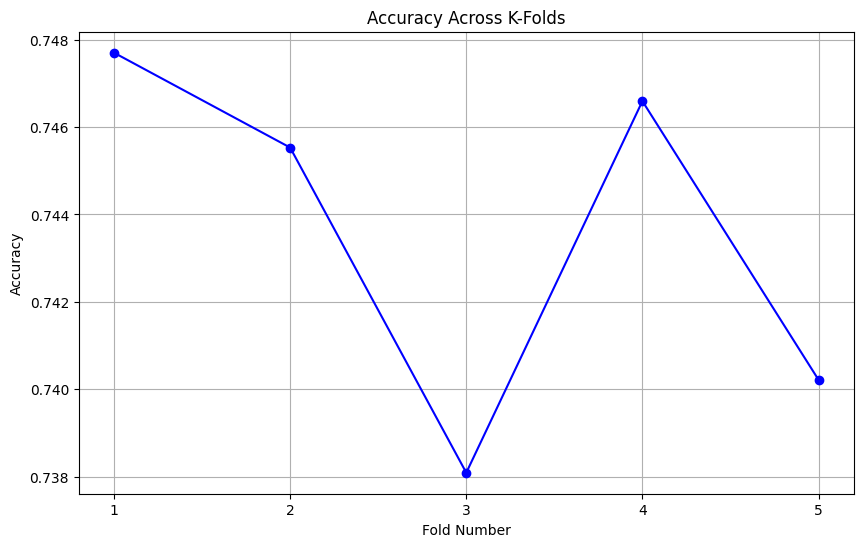

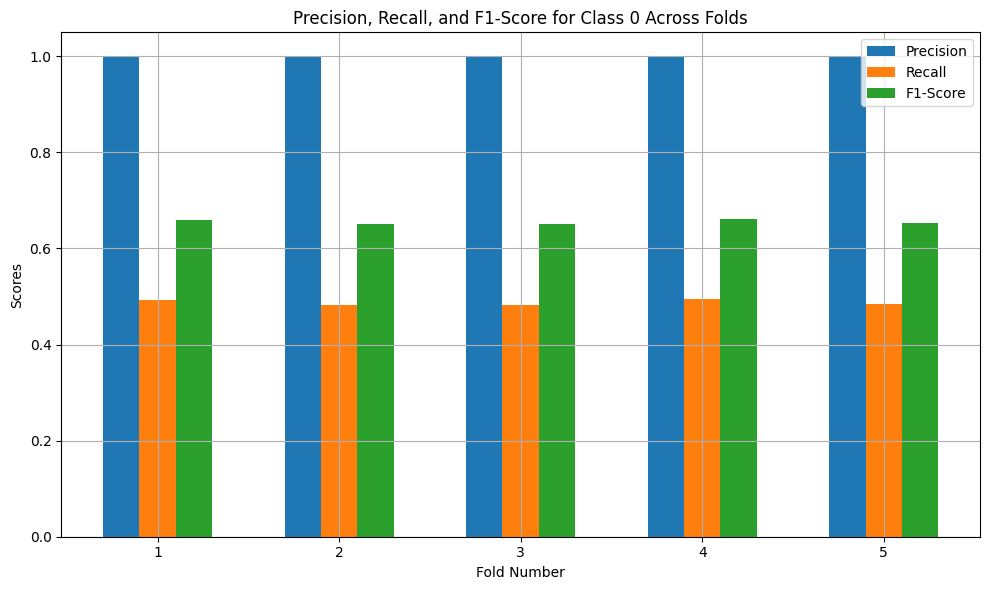

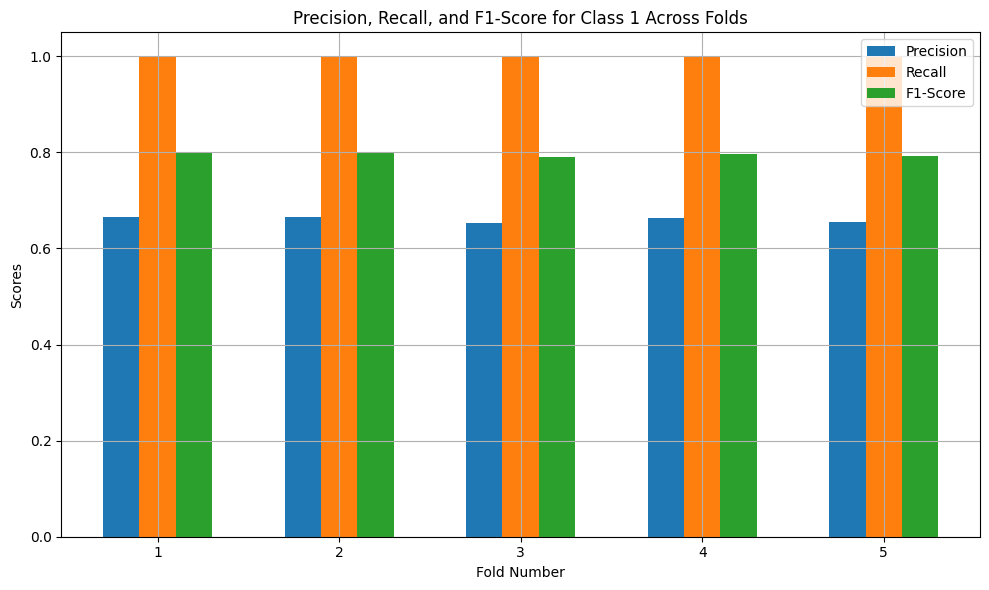

In [6]:
# 加载标签数据
y = pybug['status'].values 

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
model = SVC(kernel='rbf', random_state=42)
accuracy_scores = []
classification_reports = []

for fold, (train_index, test_index) in enumerate(kf.split(X_combined), 1):
    X_train, X_test = X_combined[train_index], X_combined[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)
    print(f"Fold {fold} Accuracy: {accuracy:.4f}")
    print(f"Fold {fold} Classification Report:\n{classification_report(y_test, y_pred)}")

print(f"\nMean Accuracy: {np.mean(accuracy_scores):.4f}")

disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix - Mean Accuracy: {np.mean(accuracy_scores):.4f}')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, k+1), accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy Across K-Folds')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(range(1, k+1))
plt.grid(True)
plt.show()

labels = classification_reports[0].keys()  # Assuming all folds have the same labels
for label in classification_reports[0].keys():
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = [report[label]['precision'] for report in classification_reports]
        recall = [report[label]['recall'] for report in classification_reports]
        f1_score = [report[label]['f1-score'] for report in classification_reports]
        
        x = np.arange(1, k + 1)  # Fold numbers
        width = 0.2  # the width of the bars
        
        fig, ax = plt.subplots(figsize=(10, 6))
        rects1 = ax.bar(x - width, precision, width, label='Precision')
        rects2 = ax.bar(x, recall, width, label='Recall')
        rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')
        
        ax.set_xlabel('Fold Number')
        ax.set_ylabel('Scores')
        ax.set_title(f'Precision, Recall, and F1-Score for Class {label} Across Folds')
        ax.set_xticks(x)
        ax.set_xticklabels(range(1, k + 1))
        ax.legend()
        
        fig.tight_layout()
        plt.grid(True)
        plt.show()

In [9]:
# 假设你有一个用于训练的自定义数据集
class CodeDataset(Dataset):
    def __init__(self, codes, labels, tokenizer, max_length=128):
        self.codes = codes
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.codes)

    def __getitem__(self, idx):
        code = self.codes[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            code, 
            return_tensors='pt', 
            padding='max_length', 
            truncation=True, 
            max_length=self.max_length
        )
        encoding = {key: val.squeeze(0) for key, val in encoding.items()}  # 去掉 batch 维度
        encoding['labels'] = torch.tensor(label)
        return encoding

# 加载CodeBERT模型和tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
codebert_model = AutoModelForSequenceClassification.from_pretrained("microsoft/codebert-base", num_labels=2)

# 准备数据
train_codes, test_codes, train_labels, test_labels = train_test_split(
    pybug['before_merge'], pybug['status'], test_size=0.2, random_state=42, stratify=pybug['status'])

train_dataset = CodeDataset(train_codes.tolist(), train_labels.tolist(), tokenizer)
test_dataset = CodeDataset(test_codes.tolist(), test_labels.tolist(), tokenizer)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

# 定义优化器
optimizer = AdamW(codebert_model.parameters(), lr=5e-5)

# 开始训练
codebert_model.train()

for epoch in range(3):  # 假设训练3个epoch
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        inputs = {key: val for key, val in batch.items()}
        outputs = codebert_model(**inputs)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")

# 评估模型
codebert_model.eval()
correct, total = 0, 0
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: val for key, val in batch.items()}
        outputs = codebert_model(**inputs)
        predictions = torch.argmax(outputs.logits, dim=-1)
        correct += (predictions == inputs['labels']).sum().item()
        total += inputs['labels'].size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

c:\Users\FKun\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\FKun\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. U

Epoch 1, Loss: 0.4388404328128054


In [ ]:
# 故障定位到字节级别
def locate_fault(code):
    inputs = tokenizer(code, return_tensors="pt", padding=True, truncation=True)
    outputs = codebert_model(**inputs)
    logits = outputs.logits
    fault_position = torch.argmax(logits, dim=-1).item()  # 获取故障位置
    return fault_position

pybug['fault_position'] = pybug['before_merge'].apply(locate_fault)

In [ ]:
# 锁定故障单词或表达式
def extract_faulty_expression(code, fault_position):
    words = code.split()
    fault_word = words[fault_position] if fault_position < len(words) else words[-1]
    return fault_word

pybug['faulty_expression'] = pybug.apply(lambda row: extract_faulty_expression(row['before_merge'], row['fault_position']), axis=1)


In [ ]:
# 删除故障部分
def remove_faulty_expression(code, fault_word):
    return code.replace(fault_word, '')

pybug['code_without_fault'] = pybug.apply(lambda row: remove_faulty_expression(row['before_merge'], row['faulty_expression']), axis=1)


In [ ]:
# 初始化 tokenizer 和 model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
gpt_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
gpt_model = GPT2LMHeadModel.from_pretrained('gpt2').to(device)

# 为GPT-2模型添加 pad_token（使用 eos_token 作为填充符号）
gpt_tokenizer.pad_token = gpt_tokenizer.eos_token

def generate_completion(code):
    # 确保输入是字符串类型，如果不是，则转换为字符串
    if not isinstance(code, str):
        code = str(code)
        
    print(f"Input code: {code}")  # 调试用
    
    try:
        # 编码输入
        inputs = gpt_tokenizer(code, return_tensors="pt", padding=True, truncation=True).to(device)
    
        # 打印编码后的数据
        print(f"Encoded inputs: {inputs}")

        # 添加 attention_mask 以避免 pad_token_id 和 eos_token_id 冲突
        attention_mask = (inputs['input_ids'] != gpt_tokenizer.pad_token_id).long()
        print(f"Attention mask: {attention_mask}")
        print(f"Input IDs: {inputs['input_ids']}")

        # 使用 max_new_tokens 而不是 max_length 来限制生成的token长度
        outputs = gpt_model.generate(
            inputs['input_ids'], 
            attention_mask=attention_mask, 
            max_new_tokens=100,  # 限制生成的最大长度
            num_return_sequences=1,
            pad_token_id=gpt_tokenizer.pad_token_id  # 确保使用 pad_token
        )
    
        # 打印模型输出
        print(f"Model outputs: {outputs}")

        generated_code = gpt_tokenizer.decode(outputs[0], skip_special_tokens=True)
        return generated_code

    except Exception as e:
        # 捕获异常并打印错误信息
        print(f"Error during completion generation: {e}")
        return None  # 如果出错返回 None 或者你可以返回一个默认值

# 确保 code_without_fault 列中所有数据为字符串类型，处理缺失值
pybug['code_without_fault'] = pybug['code_without_fault'].astype(str).fillna('')

# 应用 generate_completion 函数到 DataFrame，使用 lambda 函数避免直接传递
pybug['repaired_code'] = pybug['code_without_fault'].apply(lambda x: generate_completion(x))


In [ ]:
# BERT模型用于代码嵌入
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
# bert_model = bert_model.to(device)


In [ ]:
import torch

def embed_code(code):
    # 检查输入是否为字符串并处理为空或无效的情况
    if isinstance(code, str):
        inputs = bert_tokenizer(code, return_tensors='pt', padding=True, truncation=True)
        with torch.no_grad():
            outputs = bert_model(**inputs)
            embeddings = outputs.last_hidden_state.mean(dim=1)
        return embeddings.cpu().numpy()
    else:
        # 如果输入不是字符串，返回 None
        return None

# 应用到 `repaired_code` 列，并处理异常情况
pybug['code_embeddings'] = pybug['repaired_code'].apply(embed_code)


In [ ]:
# 检查所有的嵌入并打印详细信息
def check_embedding_shapes(embeddings):
    none_count = 0
    invalid_shape_count = 0
    valid_count = 0
    for idx, embedding in enumerate(embeddings):
        if embedding is None:
            none_count += 1
            print(f"Embedding at index {idx} is None.")
        else:
            if embedding.shape != (768,):
                invalid_shape_count += 1
                print(f"Embedding at index {idx} has invalid shape {embedding.shape}.")
            else:
                valid_count += 1
                print(f"Embedding at index {idx} is valid with shape {embedding.shape}.")
    
    print(f"\nSummary:")
    print(f"None embeddings: {none_count}")
    print(f"Invalid shape embeddings: {invalid_shape_count}")
    print(f"Valid embeddings: {valid_count}")

# 调用检查函数
check_embedding_shapes(pybug['code_embeddings'].values)

In [ ]:
def embed_code(code):
    # 确保代码作为文本输入进行处理
    if isinstance(code, str):
        inputs = bert_tokenizer(code, return_tensors='pt', padding=True, truncation=True)
        with torch.no_grad():
            outputs = bert_model(**inputs)
            embeddings = outputs.last_hidden_state.mean(dim=1).squeeze()  # 使用 squeeze 去除多余的维度
        return embeddings.cpu().numpy()
    else:
        return None

# 应用到 `repaired_code` 列
pybug['code_embeddings'] = pybug['repaired_code'].apply(embed_code)

In [ ]:
# 过滤掉无效的嵌入，并确保所有嵌入的维度相同
def fix_embedding_shape(embedding):
    if embedding is not None:
        embedding = np.squeeze(embedding)  # 去除多余的维度
        if embedding.shape == (768,):  # 确保形状正确
            return embedding
    return None

# 应用修复函数
pybug['code_embeddings'] = pybug['code_embeddings'].apply(fix_embedding_shape)

# 过滤掉无效的嵌入
valid_embeddings = [embedding for embedding in pybug['code_embeddings'].values if embedding is not None]

# 确保有有效的嵌入进行 vstack 操作
if len(valid_embeddings) > 0:
    X_embeddings = np.vstack(valid_embeddings)
    print(f"Stacked embeddings shape: {X_embeddings.shape}")
else:
    raise ValueError("No valid embeddings to stack.")

In [ ]:
# 集成学习 - Stacking
# 定义基础模型
estimators = [('svm', model)]

# 创建堆叠分类器，使用 XGBoost 作为最终分类器
stacking_model = StackingClassifier(estimators=estimators,final_estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))

# 如果 X_combined 是 numpy 数组，直接使用
# 确保 X_combined 和 X_embeddings 的行数相同
min_samples = min(X_combined.shape[0], X_embeddings.shape[0])

# 裁剪 X_combined 和 X_embeddings 以使它们的大小一致
X_combined_trimmed = X_combined[:min_samples]
X_embeddings_trimmed = X_embeddings[:min_samples]

# 然后进行堆叠
X_stacked = np.column_stack([X_combined_trimmed, X_embeddings_trimmed])

# 训练堆叠分类器
stacking_model.fit(X_stacked, y[:min_samples])

In [ ]:
# 确保 X_combined 和 X_embeddings 的行数一致
#min_samples = min(X_combined.shape[0], X_embeddings.shape[0])

# 裁剪 X_combined 和 X_embeddings 以使它们的行数匹配
#X_combined_trimmed = X_combined[:min_samples]
#X_embeddings_trimmed = X_embeddings[:min_samples]

# 进行列堆叠
#X_stacked = np.column_stack([X_combined_trimmed, X_embeddings_trimmed])

# 使用裁剪后的数据进行预测
final_fault_locs = stacking_model.predict(X_stacked)

# 将预测结果添加到 pybug 的前 min_samples 行
pybug.loc[:min_samples-1, 'final_fault_location'] = final_fault_locs



In [ ]:
correct_repairs = 0

def validate_repair(code, original_label):
    repaired_code = generate_completion(code)
    
    # 如果生成的代码为 None，返回错误信息或默认值
    if repaired_code is None:
        print(f"Warning: generated completion for code is None")
        return None, False
    
    # 检查 repaired_code 是否为字符串
    if not isinstance(repaired_code, str):
        raise ValueError(f"repaired_code is not a string, got {type(repaired_code)}")
    
    # 使用 'text' 参数来明确传递输入
    inputs = tokenizer(repaired_code, return_tensors="pt", padding=True, truncation=True).to(device)
    
    # 对模型进行前向传播
    with torch.no_grad():  # 确保不计算梯度
        outputs = codebert_model(**inputs)
        
    prediction = torch.argmax(outputs.logits, dim=-1).item()
    
    if prediction == original_label:
        global correct_repairs
        correct_repairs += 1
        return repaired_code, True
    else:
        return repaired_code, False

# 应用函数来验证修复的代码
pybug['validated_repair'] = pybug.apply(lambda row: validate_repair(row['repaired_code'], row['status']), axis=1)


In [ ]:
# 检查修复准确度
repair_accuracy = correct_repairs / len(pybug)
print(f"Repair Accuracy: {repair_accuracy:.2f}")

if repair_accuracy >= 0.7:
    pybug['final_repaired_code'] = pybug['validated_repair'].apply(lambda x: x[0])
    pybug['final_repaired_code'].to_csv('final_repaired_codes.csv', index=False)
    print("Final repaired codes have been saved.")
else:
    print("Repair accuracy is insufficient, further steps needed.")

# 评估最终修复结果的准确度
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# 定义深度学习模型
class CodeRepairModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(CodeRepairModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# init
input_size = X_train.shape[1]
hidden_size = 128
num_classes = 2  # 二分类
model = CodeRepairModel(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
train_accuracies = []


In [ ]:
# 训练深度学习模型
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    inputs = torch.tensor(X_train, dtype=torch.float32)
    labels = torch.tensor(y_train, dtype=torch.long)
    
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    train_accuracy = correct / len(labels)
    train_accuracies.append(train_accuracy)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [ ]:
# 评估模型
model.eval()
with torch.no_grad():
    # inputs = torch.tensor(X_test, dtype=torch.float32).to(device)
    # labels = torch.tensor(y_test, dtype=torch.long).to(device)
    inputs = torch.tensor(X_test, dtype=torch.float32)
    labels = torch.tensor(y_test, dtype=torch.long)
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    accuracy = correct / len(labels)
    print(f'Accuracy: {accuracy:.4f}')




In [ ]:
# 检查是否达到70%的准确率
if accuracy >= 0.7:
    pybug['repaired_code'].to_csv('final_repaired_codes.csv', index=False)
    print("Final repaired codes have been saved.")
else:
    print("Accuracy is insufficient, returning to the first part for further repair.")